#Churn Prediction Model for PowerCO business

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
final_data = pd.read_csv(r"/content/data_for_predictions.csv",encoding = "unicode_escape")

In [ ]:
final_data.head()


,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,...,2,6,0,0,1,0,0,0,0,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,...,76,4,1,0,0,0,0,1,0,0
2,2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,...,68,8,0,0,1,0,0,1,0,0
3,3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,...,69,9,0,0,0,1,0,1,0,0
4,4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,...,71,9,1,0,0,0,0,1,0,0


In [ ]:
final_data =final_data.drop(["id","Unnamed: 0"],axis=1)

In [ ]:
final_data.columns

Index(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
       'forecast_price_pow_off_peak', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'pow_max', 'var_year_price_off_peak_var',
       'var_year_price_peak_var', 'var_year_price_mid_peak_var',
       'var_year_price_off_peak_fix', 'var_year_price_peak_fix',
       'var_year_price_mid_peak_fix', 'var_year_price_off_peak',
       'var_year_price_peak', 'var_year_price_mid_peak',
       'var_6m_price_off_peak_var', 'var_6m_price_peak_var',
       'var_6m_price_mid_peak_var', 'var_6m_price_off_peak_fix',
       'var_6m_price_peak_fix', 'var_6m_price_mid_peak_fix',
       'var_6m_price_off_peak', 'var_6m_price_peak', 'var_6m_price_mid_peak',
       'churn', 'offpeak_diff_dec_january_energy',
       'offpeak_diff_dec_january

In [ ]:
final_data.isnull().sum()

cons_12m                                      0
cons_gas_12m                                  0
cons_last_month                               0
forecast_cons_12m                             0
forecast_discount_energy                      0
                                             ..
channel_lmkebamcaaclubfxadlmueccxoimlema      0
channel_usilxuppasemubllopkaafesmlibmsdf      0
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws    0
origin_up_ldkssxwpmemidmecebumciepifcamkci    0
origin_up_lxidpiddsbxsbosboudacockeimpuepw    0
Length: 62, dtype: int64

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 62 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   cons_12m                                    14606 non-null  float64
 1   cons_gas_12m                                14606 non-null  float64
 2   cons_last_month                             14606 non-null  float64
 3   forecast_cons_12m                           14606 non-null  float64
 4   forecast_discount_energy                    14606 non-null  float64
 5   forecast_meter_rent_12m                     14606 non-null  float64
 6   forecast_price_energy_off_peak              14606 non-null  float64
 7   forecast_price_energy_peak                  14606 non-null  float64
 8   forecast_price_pow_off_peak                 14606 non-null  float64
 9   has_gas                                     14606 non-null  int64  
 10  imp_cons  

<Axes: >

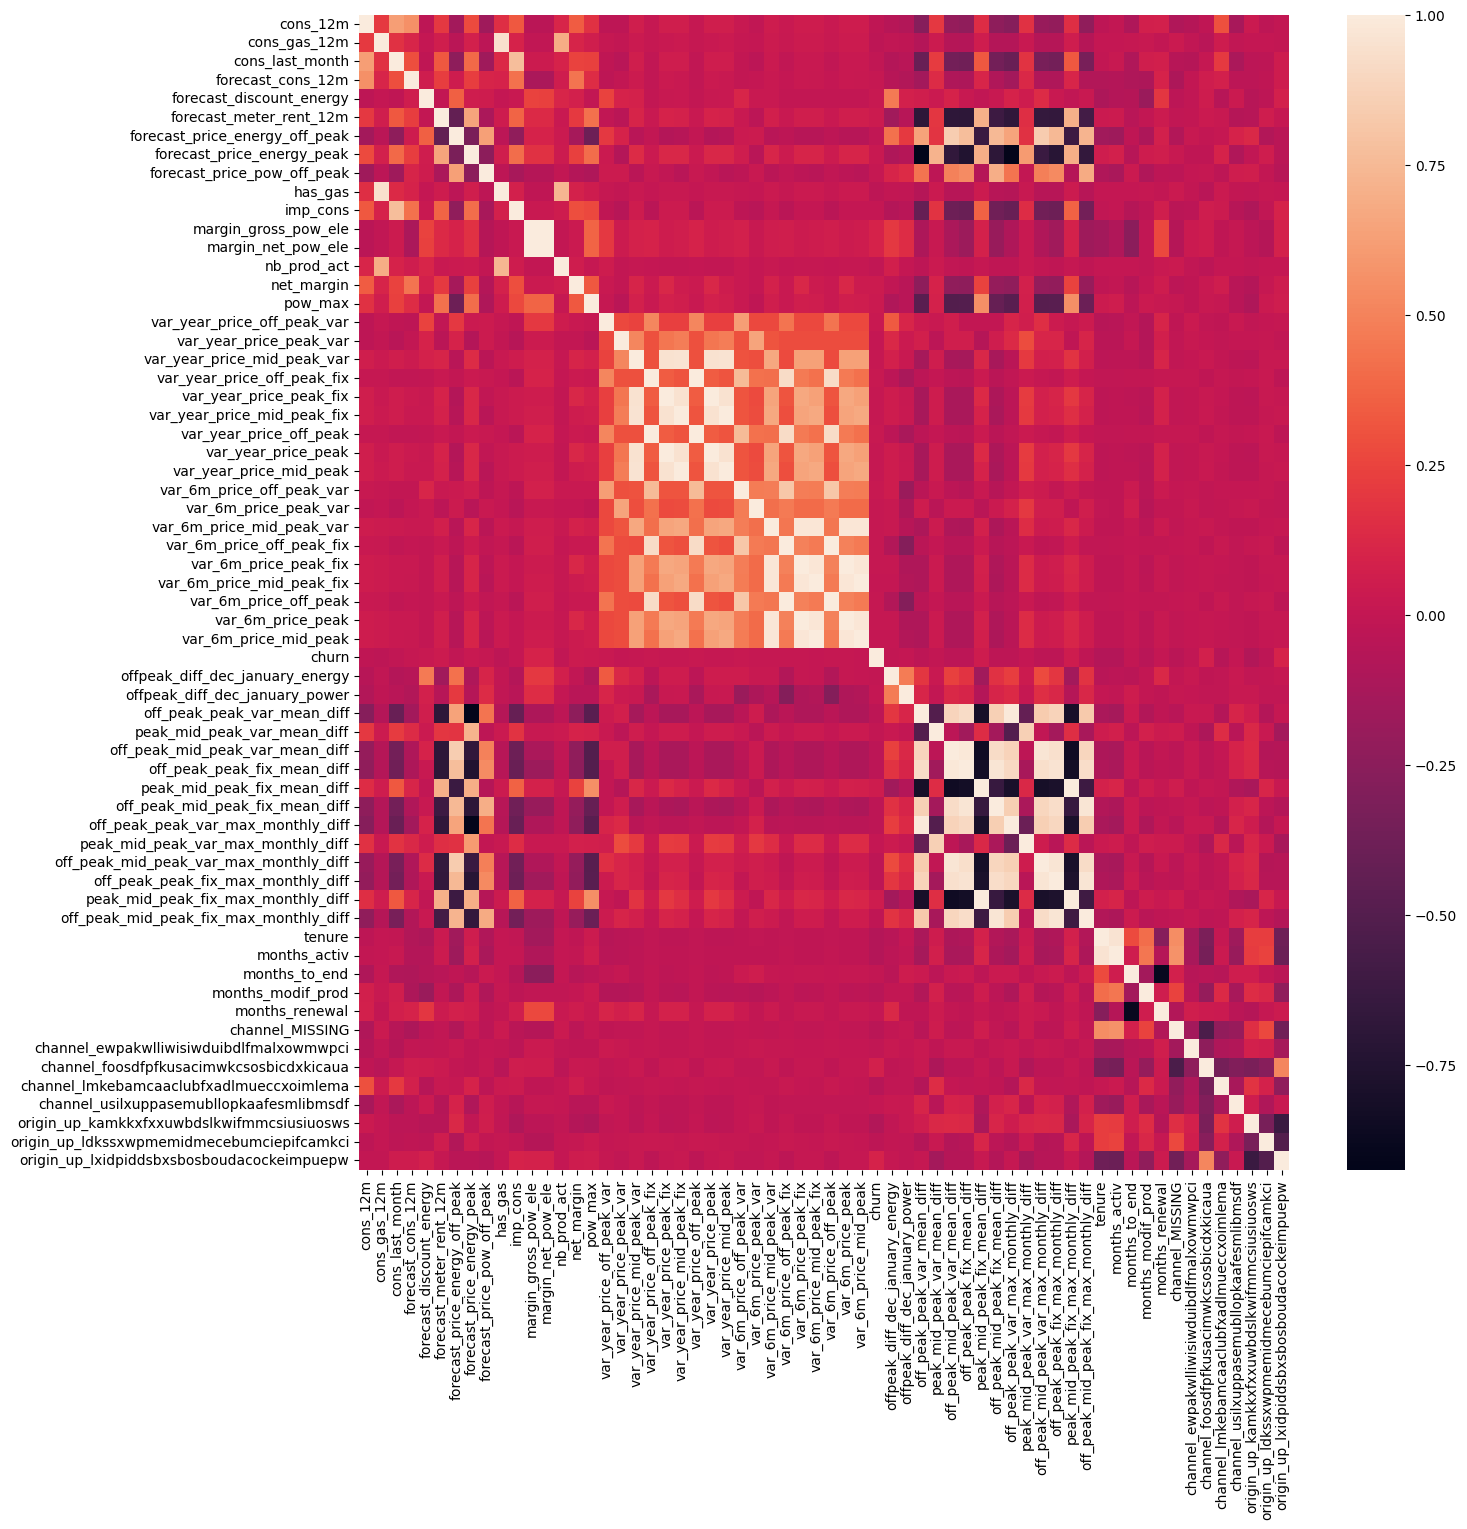

In [ ]:
#correlation in final_data
plt.figure(figsize=(15,15))
sns.heatmap(final_data.corr())

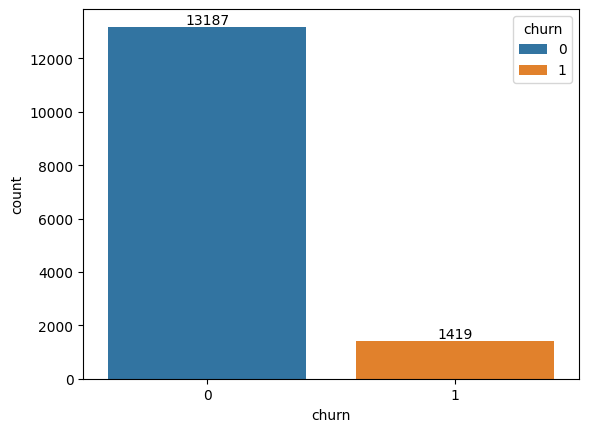

In [ ]:
ax = sns.countplot(x="churn",data = final_data,hue="churn")
for bars in ax.containers:
  ax.bar_label(bars)

In [ ]:
y = final_data["churn"]
x = final_data.drop(["churn"],axis=1)


In [ ]:
print(x.shape,y.shape)

(14606, 61) (14606,)


In [ ]:
#importing train_test split model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,stratify = y,random_state =42)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(14606, 61) (10954, 61) (3652, 61)


In [ ]:
#importing the randomforest classifier
classifier = RandomForestClassifier(n_estimators=1000)

In [ ]:
#training the model
classifier.fit(x_train,y_train)
train_accuracy_prediction = cross_val_score(classifier,x_train,y_train,cv=5)
print(train_accuracy_prediction )


[0.91099954 0.90415335 0.90324053 0.90506618 0.90547945]


In [ ]:
print(train_accuracy_prediction.mean() )

0.9057878119079922


In [ ]:
test_accuracy_prediction = cross_val_score(classifier,x_test,y_test,cv=5)
print(test_accuracy_prediction)

[0.90424077 0.9001368  0.90273973 0.90273973 0.90410959]


In [ ]:
print(test_accuracy_prediction.mean())

0.902793321215074


True neg: 3289
False pos: 326
False neg: 8
True pos: 29
Accuracy: 0.9085432639649507
Precision: 0.08169014084507042
recall: 0.7837837837837838


<Axes: >

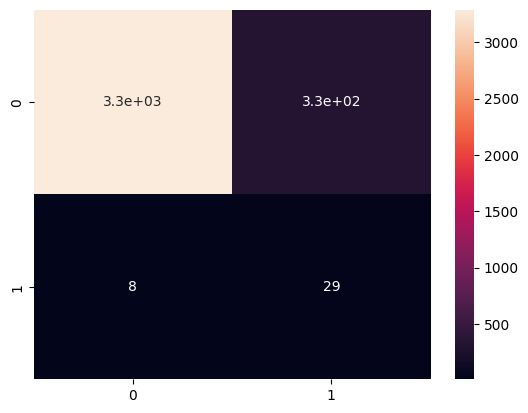

In [ ]:
x_test_prediction =classifier.predict(x_test)
cm = confusion_matrix(x_test_prediction,y_test)
true_neg, false_pos, false_neg, true_pos = cm.ravel()
print("True neg:",true_neg)
print("False pos:",false_pos)
print("False neg:",false_neg)
print("True pos:",true_pos)
print("Accuracy:",accuracy_score(x_test_prediction,y_test))
print("Precision:",precision_score(x_test_prediction,y_test))
print("recall:",recall_score(x_test_prediction,y_test))
cm
sns.heatmap(cm,annot = True)


Text(0.5, 0, 'Importance')

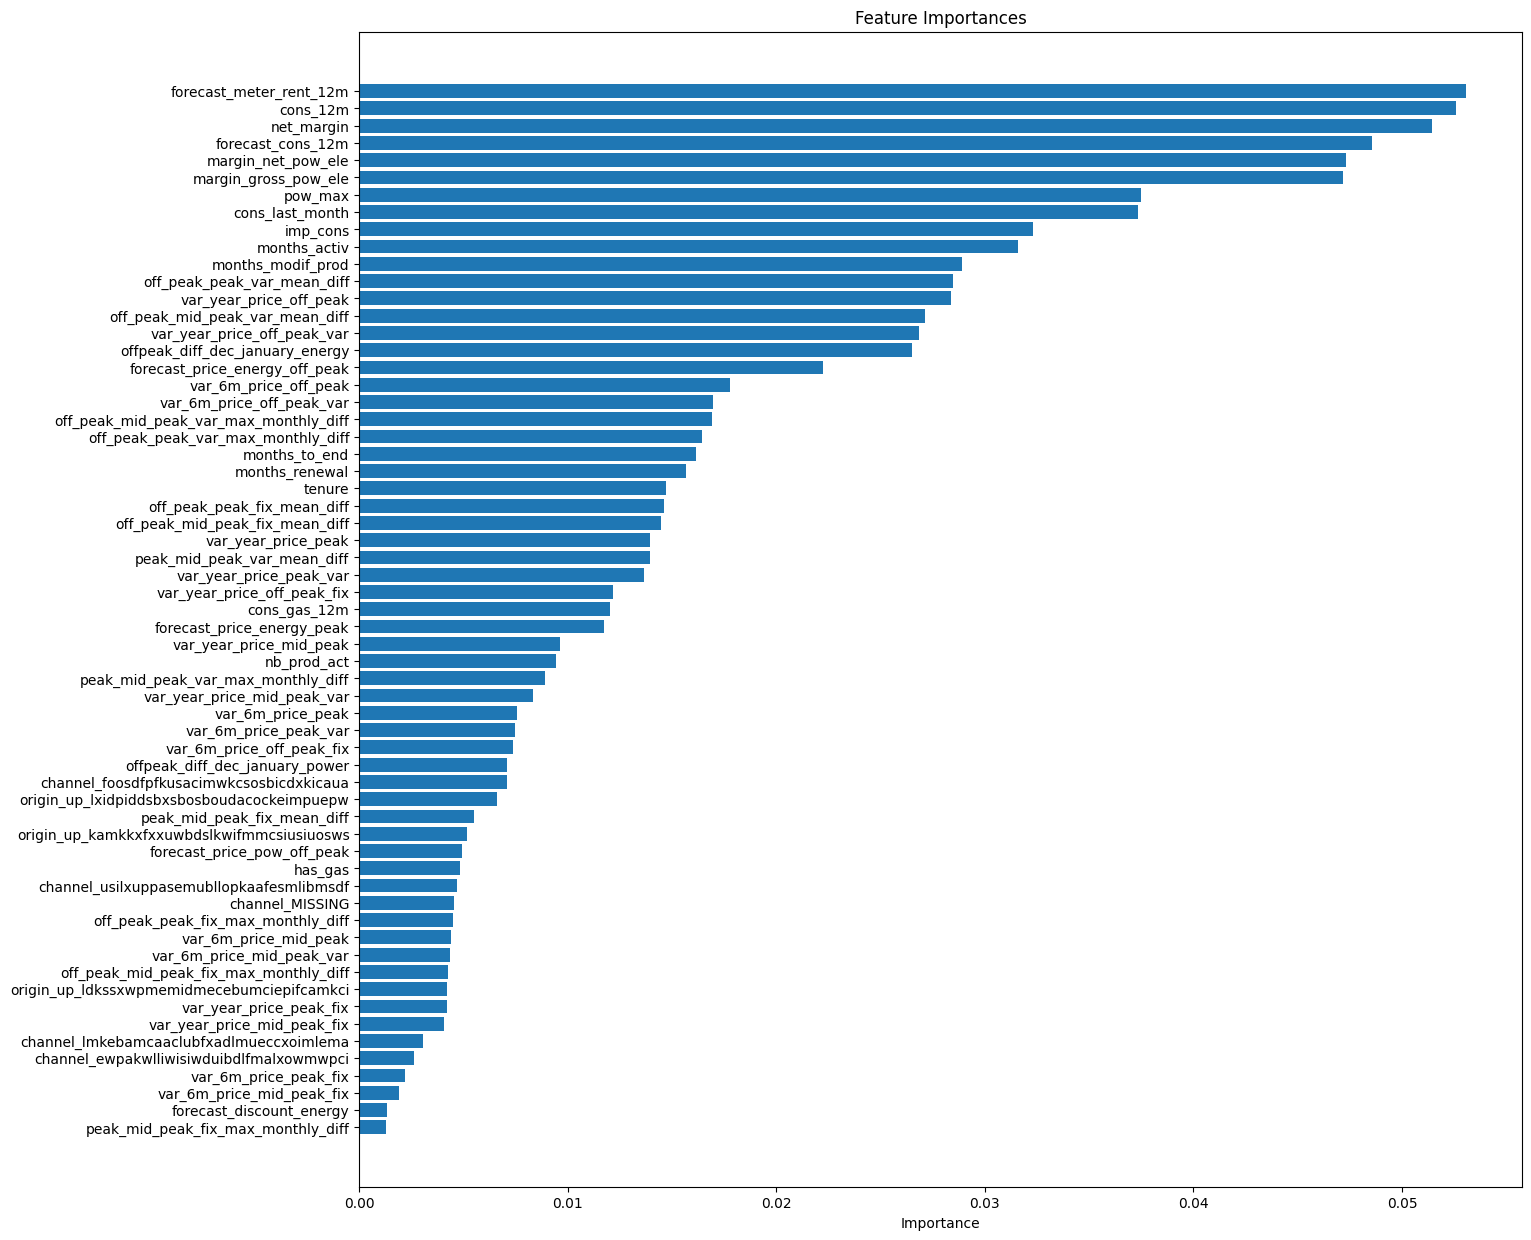

In [ ]:
#Feature Importance
plt.figure(figsize=(15,15))
feature_importances = pd.DataFrame({
    'features': x_train.columns,
    'importance': classifier.feature_importances_
}).sort_values(by='importance').reset_index()
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'])
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')

- consumption over 12 months is a top driver for churn in this model

In [ ]:
input_array =input("Enter the Features:")
input_nparray = np.asarray(input_array)
input_nparray_reshape = np.asarray(input_array).reshape(1,-1)


In [ ]:
prediction = classifier.predict(input_nparray_reshape)
if(prediction[0]==1):
  print(" constumer churn")
else:
  print("customer not churn")